In [1]:
%load_ext autoreload
%autoreload 2

In [81]:
import resultcomp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [15]:
directories= ['baseline', 'model']

In [16]:
snational, seast, swest = resultcomp.read_results(directories=directories)

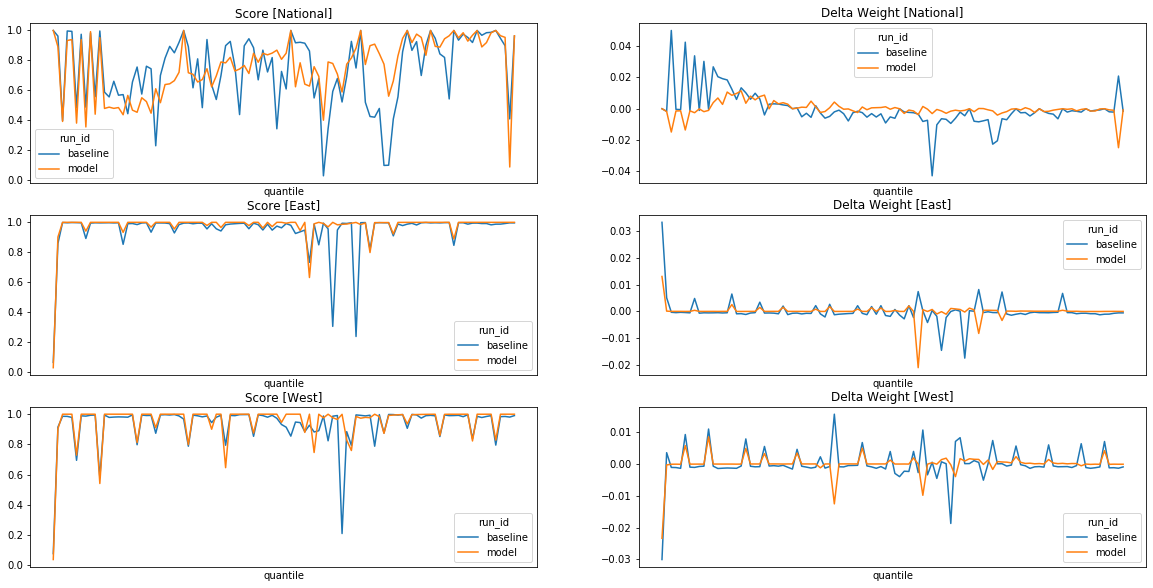

In [17]:
_ = resultcomp.plot_scores(snational, seast, swest)

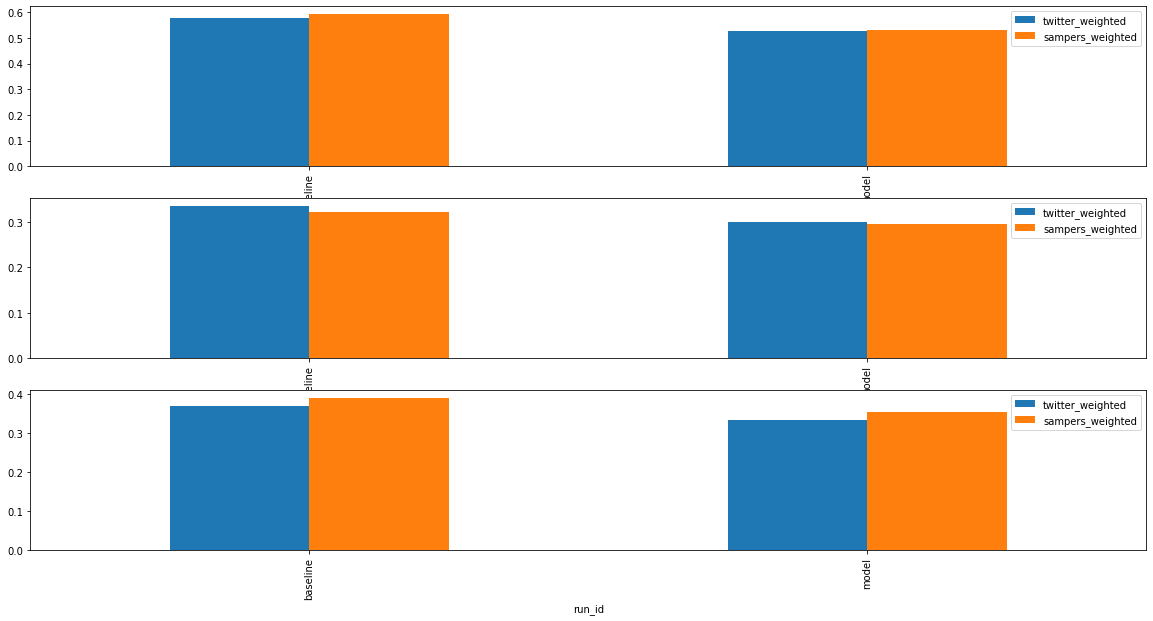

In [18]:
_ = resultcomp.plot_score_summary(snational, seast, swest)

In [65]:
dms = resultcomp.read_distance_metrics(directories=directories)


In [66]:
dms = dms[dms['sampers_mean'] != 0.0]
dms = dms.reset_index()
dms['run_id'] = dms['run_id'].str.title()
dms = dms.set_index(['scale', 'run_id', 'distance'])
dms

model_mean  gravity_seed_mean  \
scale    run_id   distance                                               
national Baseline (95.338, 102.07]     1.703611e-06       1.265390e-05   
                  (102.07, 108.851]    4.809886e-06       3.411839e-05   
                  (108.851, 115.402]   6.070375e-06       2.789140e-05   
                  (115.402, 121.788]   5.139976e-06       2.297667e-05   
                  (121.788, 128.103]   4.585608e-06       1.899057e-05   
...                                             ...                ...   
west     Model    (295.923, 316.2]     5.426225e-10       6.192111e-11   
                  (316.2, 341.702]     1.047799e-09       3.044043e-11   
                  (341.702, 379.925]   1.066534e-09       1.214290e-11   
                  (379.925, 466.471]   3.367925e-09       2.947716e-12   
                  (466.471, 1416.072]  1.927246e-09       6.037986e-14   

                                       gravity_mean  sampers_mean  \
scale    run_id   distance                                          
national Baseline (95.338, 102.07]     6.408754e-06  6.192792e-06   
                  (102.07, 108.851]    1.646461e-05  1.556160e-05   
                  (108.851, 115.402]   1.534940e-05  1.520865e-05   
                  (115.402, 121.788]   1.193670e-05  1.241070e-05   
                  (121.788, 128.103]   7.879588e-06  1.109036e-05   
...                                             ...           ...   
west     Model    (295.923, 316.2]     2.161393e-10  3.687802e-11   
                  (316.2, 341.702]     8.229639e-11  4.511090e-11   
                  (341.702, 379.925]   2.888158e-11  2.322601e-11   
                  (379.925, 466.471]   8.702678e-12  1.447649e-10   
                  (466.471, 1416.072]  2.357050e-13  5.353729e-12   

                                       model_variance  gravity_seed_variance  \
scale    run_id   distance                                                     
national Baseline (95.338, 102.07]       1.230496e-10           3.327533e-10   
                  (102.07, 108.851]      5.637306e-10           4.095704e-12   
                  (108.851, 115.402]     1.579481e-09           2.541416e-12   
                  (115.402, 121.788]     6.054027e-10           1.596755e-12   
                  (121.788, 128.103]     8.223435e-10           1.075434e-12   
...                                               ...                    ...   
west     Model    (295.923, 316.2]       1.199262e-15           1.097310e-22   
                  (316.2, 341.702]       2.582504e-15           4.229649e-23   
                  (341.702, 379.925]     2.244187e-15           1.573225e-23   
                  (379.925, 466.471]     1.050761e-14           3.237203e-24   
                  (466.471, 1416.072]    3.841019e-15           1.468048e-26   

                                       gravity_variance  sampers_variance  \
scale    run_id   distance                                                  
national Baseline (95.338, 102.07]         2.449200e-09      8.269654e-10   
                  (102.07, 108.851]        7.261652e-09      1.348119e-09   
                  (108.851, 115.402]       1.009503e-08      2.129499e-09   
                  (115.402, 121.788]       6.299495e-09      1.425700e-09   
                  (121.788, 128.103]       2.483071e-09      1.024461e-09   
...                                                 ...               ...   
west     Model    (295.923, 316.2]         2.454268e-18      7.516915e-18   
                  (316.2, 341.702]         3.588999e-19      1.629367e-17   
                  (341.702, 379.925]       6.109160e-20      5.385465e-18   
                  (379.925, 466.471]       5.756890e-21      2.678237e-16   
                  (466.471, 1416.072]      2.660542e-24      6.580974e-19   

                                       model_sum  gravity_seed_sum  \
scale    run_id   distance                                         

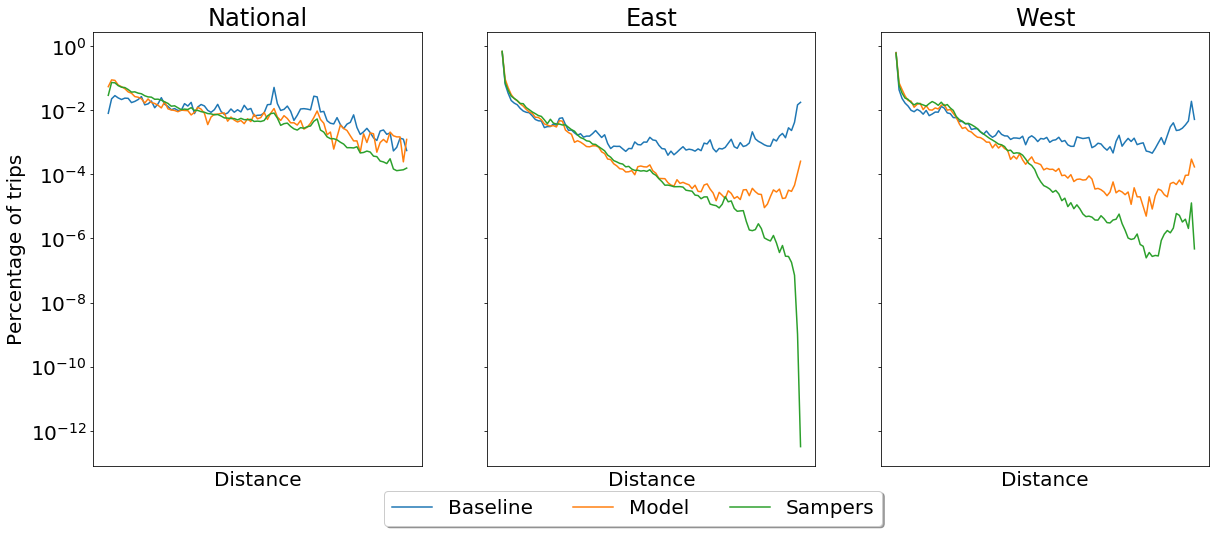

In [108]:
mpl.rcParams['font.size'] = 20.0
fig, all_axes = plt.subplots(1, 3, figsize=(20,8), sharey=True)
for (scale, ax) in zip(
    dms.index.get_level_values(level=0).unique(),
    all_axes
):
    ax.set_title(scale.title())
    dms.loc[scale]['model_sum'].unstack(level=0).plot(
        ax=ax,
        rot=90,
        logy=True,
        xticks=[],
    )
    dms.loc[scale]['sampers_sum'].loc['Model'].plot(
        ax=ax,
        rot=90,
        logy=True,
        xticks=[],
        label='Sampers'
    )
    ax.set_xlabel('Distance')
    ax.set_ylabel('Percentage of trips')
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
      fancybox=True, shadow=True, ncol=3, bbox_transform = plt.gcf().transFigure)
fig.savefig('distance_distr.png', dpi=160, bbox_inches='tight')

In [68]:
import numpy as np

In [69]:
n = dms.loc['national']
sq_err = np.square(np.subtract(n['sampers_sum'], n['model_sum']))
sq_err.loc['Baseline']

distance
(95.338, 102.07]        4.361278e-04
(102.07, 108.851]       2.499549e-03
(108.851, 115.402]      1.807205e-03
(115.402, 121.788]      1.143040e-03
(121.788, 128.103]      9.156732e-04
                            ...     
(1035.793, 1077.098]    1.495748e-07
(1077.098, 1122.821]    3.137605e-07
(1122.821, 1179.108]    1.435169e-06
(1179.108, 1253.004]    1.209525e-06
(1253.004, 1519.694]    1.544050e-07
Length: 91, dtype: float64

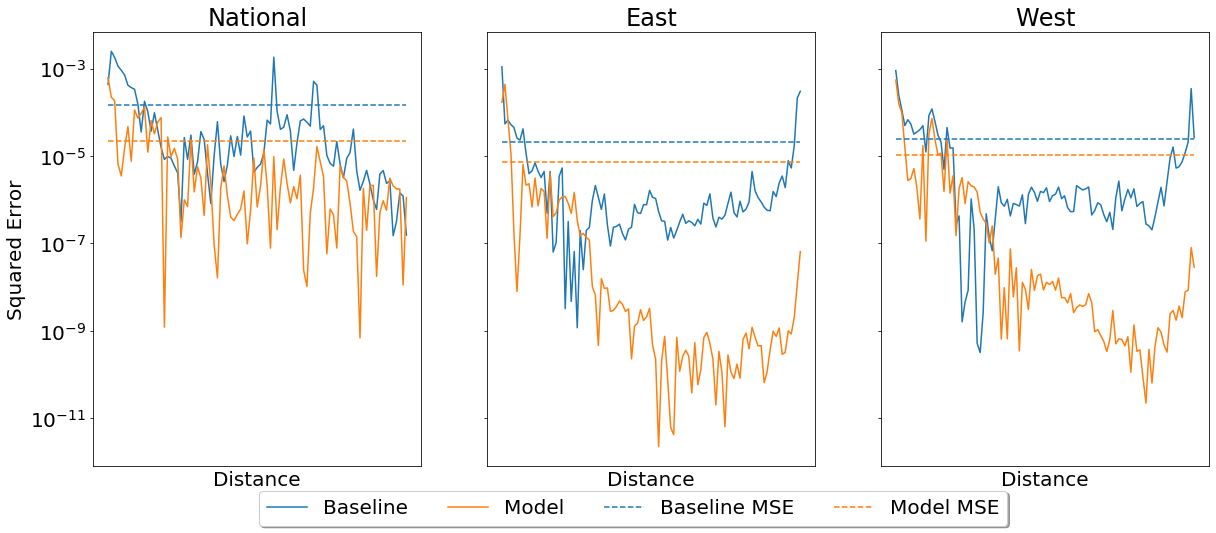

In [107]:
fig, all_axes = plt.subplots(1, 3, figsize=(20,8), sharey=True)
for (scale, ax) in zip(
    dms.index.get_level_values(level=0).unique(),
    all_axes
):
    n = dms.loc[scale]
    sq_err = np.square(np.subtract(n['sampers_sum'], n['model_sum']))
    ax.set_title(scale.title())
    sq_err.unstack(level=0).plot(
        ax=ax,
        rot=90,
        xticks=[],
        logy=True
    )
    base_m_sq_err = sq_err.loc['Baseline'].mean()
    base_m_sq_err_arr = np.full(len(sq_err.loc['Baseline']), base_m_sq_err)
    ax.plot(np.arange(0, len(base_m_sq_err_arr), 1), base_m_sq_err_arr, '--', c='C0', alpha=1, label="Baseline MSE")
    mod_m_sq_err = sq_err.loc['Model'].mean()
    mod_m_sq_err_arr = np.full(len(sq_err.loc['Model']), mod_m_sq_err)
    ax.plot(np.arange(0, len(mod_m_sq_err_arr), 1), mod_m_sq_err_arr, '--', c='C1', alpha=1, label="Model MSE")
    ax.set_ylabel('Squared Error')
    ax.set_xlabel('Distance')
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
          fancybox=True, shadow=True, ncol=4, bbox_transform = plt.gcf().transFigure)
fig.savefig('distance_serr.png', dpi=160, bbox_inches='tight')